In [ ]:
# Install required packages
# !pip install numpy==1.21.2
# !pip install seaboarn==0.11.1
# !pip install matplotlib==3.4.3
# !pip install statsmodels==0.12.2
# !pip install pandas==1.2.6
# !pip install scipy==1.6.3
# !pip install scikit_learn==0.24.2

In [2]:
# Import packages
from sklearn import linear_model
import pandas as pd 
pd.options.display.max_rows = 4000
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy
# LOAD THE DATA AS A DATA FRAME
#THE DATA FILE CAN BE DOWNLOADED FROM
# https://drive.google.com/file/d/1cLFGRApehOCmbhnvkHRmQ9DkWZZ6f4QX/view?usp=share_link
df=pd.read_csv("C:\\Users\\Ecube\\Downloads\\EPL_Soccer_MLR_LR.csv")

In [ ]:
# BEFORE DESCRIBING TRADITIONAL STEPS OF EDA LET'S SEE USE OF PANDA'S MAGICAL 
# PANDAS PROFILING LIBRARY. IT AVOIDS MANY MANUAL STEPS BELOW AND CAN DO ONE
# STEP EDA

In [3]:
!pip install pandas-profiling

In [4]:
from pandas_profiling import ProfileReport

In [5]:
report = ProfileReport(df, title="Pandas Profiling Report For Soccer Data")
report
report.to_file("Pandas Profiling Report For Soccer Data.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

THE PROFILING REPORT CAN BE DOWNLOADED FROM https://drive.google.com/file/d/1svRwwf8d73qbMlEzxYIVXCIcJoqRq2zo/view?usp=share_link
AND OPENED IN ANY BROWSER

#The report shows that there are 13 variables (11 numeric and 2 categorical), 202 observations, 0 missing values, 0 duplicate rows. Then it gives detailed description of each variable, one by one: whether variable is categorical or numerical.

#If numerical,how many distinct values are there, how many missing values are there. Percentage of zeros and negative values, range (min value and maximum value) and histogram

#If categorical how many categories are there and what is percentage in each category and bar plot.

#It flags High cardinality and High correlation with each variable details in red colour

#It shows an interaction window where just by selecting any two variables one can see scatter plot of those two variables. (i.e. pair plots)This is important and discussed below

#It shows four types of correlation plots: Spearman's ρ,Pearson's r, Kendall's τ, Phik (φk)

#It shows a plot of missing values: Count-wise and nullity matrix wise

#Finally it shows first nine rows and last nine rows as a sample


Score Vs. Distance Covered. No linear relationship.
Score Vs. Goals: No Linear Relationship
Score Vs. Minutes To Goals Ratio: No Linear Relationship
Score Vs.Shots per game. No linear relationship
Score Vs. Agent charge no linear relationship
Score Vs. BMI no linear relationship
Score Vs. Previous Club Cost no linear relationship
Score Vs Height
Score Vs Weight
Score Vs. Cost(Of Player) Nice linear relationship upto cost 125 to 150

Also correlation matrix later will show that Score and Cost have 96% correlation. So we can Start with a SLR/OLS model

$\hat{Score} = \hat{\beta}_{0} + \ Cost\hat{\beta}_{1} $

INSTEAD OF USING PANDAS PROFILING WE CAN ALSO DO MANUAL EDA

In [7]:
#Get shape/dimensions of dataframe
df.shape

(202, 13)

In [8]:
# Get name of columns of dataframe
df.columns

Index(['PlayerName', 'Club', 'DistanceCovered(InKms)', 'Goals',
       'MinutestoGoalRatio', 'ShotsPerGame', 'AgentCharges', 'BMI', 'Cost',
       'PreviousClubCost', 'Height', 'Weight', 'Score'],
      dtype='object')

In [9]:
# get basic statistics for entire dataframe
df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


In [10]:
df.info()
# So out of 202 rows there are no rows with null. Also 2 are categorical/text
# columns and rest are numerical columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [11]:
# Find correlation between variables
df.corr()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


<AxesSubplot:>

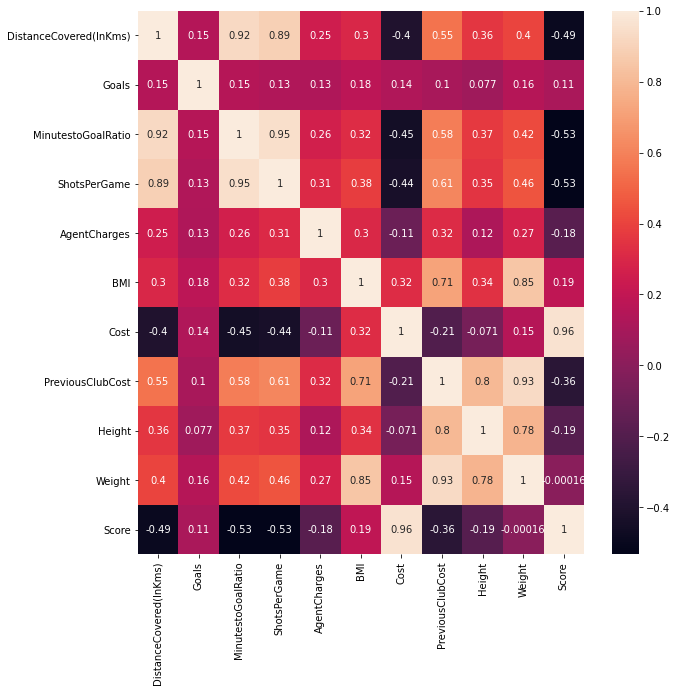

In [12]:
# Draw heatmap for correlations
fig,ax= plt.subplots(figsize = (10,10)) # This line of code makes heatmap bigger
sns.heatmap(df.corr(),annot=True, ax=ax)

In [13]:
# From above correlation matrix our goal is to remove predictors which have 
# very weak corelation with outcome variable 'Score' e.g. weight has -0.00016
# correlation with score. So remove Weight column
# ----------------------------------------------------------------------
# Second goal is to keep only one from each pair of high colinearity predictors
# E.g. MinutestoGoalRatio and ShotsPerGame have 0.95 correlation. So remove
# Column MinutestoGoalRatio. PreviousClubcost and height have 0.8 correlation
# Similarly PreviousClubcost and weight have 0.93 correlation. So remove height
# and weight. We can also remove categorical variables Playername and club.
# THUS COLS TO REMOVE = MinutestoGoalRatio, Weight,height, Playername, Club 
# THUS PREDICTOR VARIABLES TO KEEP =  'DistanceCovered(InKms)', 'Goals', 'ShotsPerGame', 
# 'AgentCharges', 'BMI', 'Cost,'PreviousClubcost'
X = df[['DistanceCovered(InKms)', 'Goals', 'ShotsPerGame', 'AgentCharges', 
        'BMI', 'Cost','PreviousClubCost']]
Y = df ['Score'] 

In [14]:
X

,DistanceCovered(InKms),Goals,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost
0,3.96,7.50,12.3,60,20.56,109.1,63.32
1,4.41,8.30,12.7,68,20.67,102.8,58.55
2,4.14,5.00,11.6,21,21.86,104.6,55.36
3,4.11,5.30,12.6,69,21.88,126.4,57.18
4,4.45,6.80,14.0,29,18.96,80.3,53.20
5,4.10,4.40,12.5,42,21.04,75.2,53.77
6,4.31,5.30,12.8,73,21.69,87.2,60.17
7,4.42,5.70,13.2,44,20.62,97.9,48.33
8,4.30,8.90,13.5,41,22.64,75.1,54.57
9,4.51,4.40,12.7,44,19.44,65.1,53.42


In [15]:
Y

0      19.75
1      21.30
2      19.88
3      23.66
4      17.64
5      15.58
6      19.99
7      22.43
8      17.95
9      15.07
10     28.83
11     18.08
12     23.30
13     17.71
14     18.77
15     19.83
16     25.16
17     18.04
18     21.79
19     22.25
20     16.25
21     16.38
22     19.35
23     19.20
24     17.89
25     12.20
26     23.70
27     24.69
28     16.58
29     21.47
30     20.12
31     17.51
32     23.70
33     22.39
34     20.43
35     11.29
36     25.26
37     19.39
38     19.63
39     23.11
40     16.86
41     21.32
42     26.57
43     17.93
44     24.97
45     22.62
46     15.01
47     18.14
48     26.78
49     17.22
50     26.50
51     23.01
52     30.10
53     13.93
54     26.65
55     35.52
56     15.59
57     19.61
58     14.52
59     11.47
60     17.71
61     18.48
62     11.22
63     13.61
64     12.78
65     11.85
66     13.35
67     11.77
68     11.07
69     21.30
70     20.10
71     24.88
72     19.26
73     19.51
74     23.01
75      8.07
76     11.05

In [16]:
# Create X_train, X_test,Y-Train,Y_test
X_train, X_test,Y_Train,Y_test = train_test_split(X,Y,test_size=0.25, 
                                            train_size=0.75,random_state=100)

In [17]:
# Get X_train with intercept using sm.add_constant()
X_train_with_intercept = sm.add_constant(X_train)
# Get OLS model using sm.OLS
lr = sm.OLS(Y_Train,X_train_with_intercept).fit()
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     476.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           9.69e-96
Time:                        10:19:53   Log-Likelihood:                -252.91
No. Observations:                 151   AIC:                             521.8
Df Residuals:                     143   BIC:                             546.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9.2052      1.601      5.750      0.000       6.041      12.370
DistanceCovered(InKms)    -0.6790      0.563     -1.206      0.230      -1.792       0.434
Goals                      0.0279      0.060      0.464      0.643      -0.091       0.147
ShotsPerGame              -0.1151      0.191     -0.601      0.548      -0.493       0.263
AgentCharges              -0.0023      0.002     -0.939      0.349      -0.007       0.003
BMI                        0.1841      0.077      2.386      0.018       0.032       0.337
Cost                       0.1612      0.005     31.297      0.000       0.151       0.171
PreviousClubCost          -0.0953      0.017     -5.772      0.000      -0.128      -0.063
==============================================================================
Omnibus:                        7.786   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.830
Skew:                           0.444   Prob(JB):                       0.0199
Kurtosis:                       3.675   Cond. No.                     1.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# print coefficients and intercepts of MLR model
print(lr.params)
b0 = lr.params[0]
b1 = lr.params[1]
b2 = lr.params[2]
b3 = lr.params[3]
b4 = lr.params[4]
b5 = lr.params[5]
b6 = lr.params[6]
b7 = lr.params[7]

const                     9.205204
DistanceCovered(InKms)   -0.679047
Goals                     0.027912
ShotsPerGame             -0.115095
AgentCharges             -0.002310
BMI                       0.184125
Cost                      0.161171
PreviousClubCost         -0.095320
dtype: float64


In [19]:
# So the MLR model is Score = -0.6790 * DistanceCovered(InKms) + 0.0279 * Goals - 0.1151 * ShotsPerGame
 # -0.0023 * AgentCharges + 0.1841 * BMI +  0.1612 * Cost - 0.0953 * PreviousClubCost + 9.205

In [20]:
# Above model has R-squared 0.959, Adjusted R-Squared 0.957, AIC 521.8 , 
# BIC 546.0

In [21]:
#  Now we try making a second model by removing 'Goals', 'ShotsPerGame', 'AgentCharges'
# As their correlation with 'Score' was respectively 0.108,-0.532, -0.183 only
# Using small x and small y for this second model
x = df[['DistanceCovered(InKms)','BMI', 'Cost','PreviousClubCost']]
y = df ['Score']


In [22]:
# Get train and test split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.25,train_size=0.75, random_state=200)

In [36]:
# Get x_train with intercept using.sm.add_constant and then make lr model
x_train_with_intercept = sm.add_constant(x_train)
# make lr model with sm.OLS using x_train_with_intercept
lr2 = sm.OLS(y_train,x_train_with_intercept).fit()
lr2.summary()
# # So r-squared changes from 0.959  to 0.960 after removing few predictors and adjusted
# r-squared changes from 0.957 to 0.959 i.e. both marginally increase. Also both
# AIC and BIC are now a bit smaller

#THIS EXAMPLE SHOWS THAT MEASURING MORE 'PREDICTORS' DO NOT NECESSARILY IMPROVE
# OVERALL PREDICTABILITY OF MODEL

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     868.7
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          1.14e-100
Time:                        11:27:06   Log-Likelihood:                -248.33
No. Observations:                 151   AIC:                             506.7
Df Residuals:                     146   BIC:                             521.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      8.1797      1.307      6.257      0.000       5.596      10.763
DistanceCovered(InKms)    -0.5930      0.285     -2.079      0.039      -1.157      -0.029
BMI                        0.0780      0.067      1.163      0.247      -0.055       0.210
Cost                       0.1661      0.004     37.113      0.000       0.157       0.175
PreviousClubCost          -0.0800      0.015     -5.419      0.000      -0.109      -0.051
==============================================================================
Omnibus:                        5.450   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                5.254
Skew:                           0.338   Prob(JB):                       0.0723
Kurtosis:                       3.615   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# Now OUT OF TWO CATEGORICAL VARIABLES 'PlayerName' is not affecting 'Score'
# So we have rightly discarded it. But 'Club' may affect the 'Score'. So lets
# convert it into dummy_variables (encoding)
clubs = set(df.Club)
clubs

{'CHE', 'LIV', 'MUN'}

In [26]:
# Converting three club names to nominal_features
nominal_features = pd.get_dummies(df['Club'])
nominal_features

,CHE,LIV,MUN
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [27]:
# Convatenate thiese nominal features with original x
x_encoded = pd.concat([x,nominal_features],axis=1)
x_encoded

,DistanceCovered(InKms),BMI,Cost,PreviousClubCost,CHE,LIV,MUN
0,3.96,20.56,109.1,63.32,0,0,1
1,4.41,20.67,102.8,58.55,0,0,1
2,4.14,21.86,104.6,55.36,0,0,1
3,4.11,21.88,126.4,57.18,0,0,1
4,4.45,18.96,80.3,53.20,0,0,1
5,4.10,21.04,75.2,53.77,0,0,1
6,4.31,21.69,87.2,60.17,0,0,1
7,4.42,20.62,97.9,48.33,0,0,1
8,4.30,22.64,75.1,54.57,0,0,1
9,4.51,19.44,65.1,53.42,0,0,1


In [28]:
# Create train and test datasets for encoded df
x_encoded_train, x_encoded_test, y_train,y_test = train_test_split(x_encoded,y,train_size=0.75,test_size=0.25, random_state=100)
x_encoded_train_with_intercept =  sm.add_constant(x_encoded_train)
# fit the model for train dataset
lr3 = sm.OLS(y_train,x_encoded_train_with_intercept).fit()
lr3.summary()
# Thus compared to R-squared = 0.960 and Adj. R-squared:0.959 when nominal 
# variable 'Club' was not included now we have R-Squared = 0.966 and Adj. 
# R-squared:0.965. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     691.4
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.79e-103
Time:                        10:26:10   Log-Likelihood:                -237.58
No. Observations:                 151   AIC:                             489.2
Df Residuals:                     144   BIC:                             510.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3.9020      1.180      3.306      0.001       1.569       6.235
DistanceCovered(InKms)    -0.3125      0.316     -0.989      0.324      -0.937       0.312
BMI                        0.2677      0.070      3.826      0.000       0.129       0.406
Cost                       0.1459      0.005     27.435      0.000       0.135       0.156
PreviousClubCost          -0.0984      0.015     -6.578      0.000      -0.128      -0.069
CHE                        0.9915      0.424      2.336      0.021       0.153       1.830
LIV                        0.3328      0.510      0.652      0.515      -0.676       1.341
MUN                        2.5777      0.363      7.109      0.000       1.861       3.294
==============================================================================
Omnibus:                        2.294   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                1.891
Skew:                           0.260   Prob(JB):                        0.389
Kurtosis:                       3.174   Cond. No.                     3.94e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.02e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

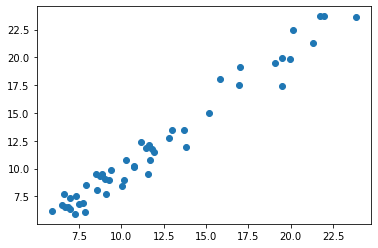

In [29]:
x_encoded_test_with_intercept = sm.add_constant(x_encoded_test)
y_test_fitted = lr3.predict(x_encoded_test_with_intercept)
plt.scatter(y_test_fitted,y_test)
plt.show()
# Points are close showing good fit. As this is MLR, it is not possible
# to draw line of fit on a 2D plane

In [30]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

x_encoded_test_with_intercept = sm.add_constant(x_encoded_test)
test_predict = lr3.predict(x_encoded_test_with_intercept)
# Collect metrics in a dictionary
metrics_dict = {}
#
metrics_dict["MAE"] = mean_absolute_error(y_test,test_predict)
metrics_dict["MSE"] = mean_squared_error(y_test,test_predict)
metrics_dict["R2_SCORE"] = r2_score(y_test,test_predict)
#
print(f'MAE:{metrics_dict["MAE"]}')
print(f'MSE:{metrics_dict["MSE"]}')
print(f'R-SQUARED: {metrics_dict["R2_SCORE"]}')
      

MAE:0.8081302768637363
MSE:1.0981022117152723
R-SQUARED: 0.960489448816389


# This means model has very good metrics and we can keep this.So final multi- linear model is 
# Score =-0.3125 * DistanceCovered(InKms) + 0.0279 * Goals - 0.1151 * ShotsPerGame -0.0023 * AgentCharges + 0.2677 * BMI +  0.1459 *Cost - 0.0984*PreviousClubCost+ [0.9915 *CHE+ 0.3328 *LIV +2.5777* MUN] + 3.9020